In [1]:
def fib_recursive(n):
    ''' Gets n-th term of the Fibonnaci sequence.
    fib(n) = fib(n-1) + fib(n-2)
    '''
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)


def fib_iterative(n):
    if n <= 1:
        return n
    previous, result = 0, 1
    for _ in range(n-1):
        result, previous = previous + result, result
    return result

testcase = 8 # 21
print(fib_recursive(testcase))
print(fib_iterative(testcase))

21
21


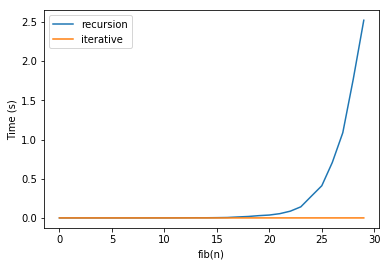

In [5]:
# Time and compare
from timeit import Timer
from matplotlib import pyplot as plt

recur_times = []
iter_times = []
test_values = list(range(30))
for i in test_values:
    timer_recur = Timer('fib_recursive({})'.format(i), 
              'from __main__ import fib_recursive')
    timer_iter = Timer('fib_iterative({})'.format(i),
                   'from __main__ import fib_iterative')
    recur_time = timer_recur.timeit(number=10)
    iter_time = timer_iter.timeit(number=10)
    recur_times.append(recur_time)
    iter_times.append(iter_time)
    
plt.plot(test_values, recur_times, label='recursion')
plt.plot(test_values, iter_times, label='iterative')
plt.xlabel('fib(n)')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

In [3]:
def fib_recursive_memo(n, memo):
    ''' Gets n-th term of the Fibonnaci sequence.
    Uses memoisation for faster computation
    fib(n) = fib(n-1) + fib(n-2)
    '''
    if n <= 1:
        return n
    elif memo[n] != None:
        return memo[n]
    else:
        result = fib_recursive_memo(n-1, memo) + fib_recursive_memo(n-2, memo)
        memo[n] = result
        return result
    
testcase = 50
memo = {i: None for i in range(testcase + 1)}
print(fib_recursive_memo(testcase, memo))

12586269025


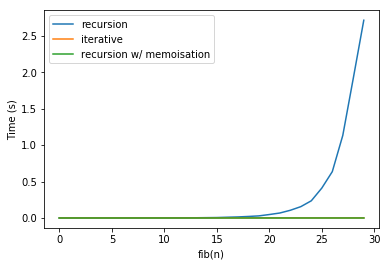

In [4]:
# Time and compare again
memo_times = []
for i in test_values:
    timer_memo = Timer('fib_recursive_memo({})'.format(i),
                   'from __main__ import fib_recursive_memo')
    memo_time = timer_iter.timeit(number=10)
    memo_times.append(iter_time)
    
plt.plot(test_values, recur_times, label='recursion')
plt.plot(test_values, iter_times, label='iterative')
plt.plot(test_values, memo_times, label='recursion w/ memoisation')
plt.xlabel('fib(n)')
plt.ylabel('Time (s)')
plt.legend()
plt.show()